In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

# Estimation
When $\lambda$ is CV.1se. 

In [2]:
data = pd.read_csv("data_ind_min.csv")
#data = data.dropna(thresh=len(data.columns)-3)
#data

In [80]:
data = pd.read_csv("data_.8_min.csv")
data_30 = data[data["n"]==300/data["alpha"]]
data_50 = data[data["n"]==500/data["alpha"]]
data_group = data_30.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_30 = pd.DataFrame()
for name in mean.columns:
    table_30[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_30 = table_30.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
#table = round(table,3)
#table[["n","p"]] = table[["n","p"]].astype(int)
data_group = data_50.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_50 = pd.DataFrame()
for name in mean.columns:
    table_50[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_50 = table_50.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
table=pd.concat([table_30,table_50],axis=1)
table

est_error  est_error_FP       TPR           FPR  \
alpha Method                                                                  
0.05  two-step           0.107(0.001)  0.037(0.001)  1.0(0.0)  0.018(0.001)   
      two-step+refitted  0.095(0.001)  0.186(0.003)  1.0(0.0)  0.018(0.001)   
      two-step oracle      0.1(0.001)      0.0(0.0)  nan(nan)      nan(nan)   
0.10  two-step           0.112(0.001)   0.04(0.001)  1.0(0.0)  0.019(0.001)   
      two-step+refitted    0.1(0.001)  0.197(0.003)  1.0(0.0)  0.019(0.001)   
      two-step oracle    0.105(0.001)      0.0(0.0)  nan(nan)      nan(nan)   
0.20  two-step           0.121(0.001)  0.042(0.001)  1.0(0.0)  0.018(0.001)   
      two-step+refitted  0.109(0.001)  0.203(0.003)  1.0(0.0)  0.018(0.001)   
      two-step oracle    0.112(0.001)      0.0(0.0)  nan(nan)      nan(nan)   

                            est_error  est_error_FP       TPR           FPR  
alpha Method                                                                 
0.05  two-step           0.085(0.001)  0.029(0.001)  1.0(0.0)  0.019(0.001)  
      two-step+refitted  0.074(0.001)  0.149(0.002)  1.0(0.0)  0.019(0.001)  
      two-step oracle    0.078(0.001)      0.0(0.0)  nan(nan)      nan(nan)  
0.10  two-step           0.088(0.001)  0.031(0.001)  1.0(0.0)  0.017(0.001)  
      two-step+refitted  0.078(0.001)  0.154(0.002)  1.0(0.0)  0.017(0.001)  
      two-step oracle    0.082(0.001)      0.0(0.0)  nan(nan)      nan(nan)  
0.20  two-step           0.096(0.001)  0.033(0.001)  1.0(0.0)  0.018(0.001)  
      two-step+refitted  0.085(0.001)  0.166(0.002)  1.0(0.0)  0.018(0.001)  
      two-step oracle    0.087(0.001)      0.0(0.0)  nan(nan)      nan(nan)

In [10]:
data = pd.read_csv("data_.8_min.csv")
data_30 = data[data["n"]==300/data["alpha"]]
data_50 = data[data["n"]==500/data["alpha"]]
data_group = data_30.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
table_30 = pd.DataFrame()
for name in mean.columns:
    table_30[name] = mean[name].map(str)
table_30 = table_30.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
#table = round(table,3)
#table[["n","p"]] = table[["n","p"]].astype(int)
data_group = data_50.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
table_50 = pd.DataFrame()
for name in mean.columns:
    table_50[name] = mean[name].map(str)
table_50 = table_50.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
table=pd.concat([table_30,table_50],axis=1)
table

est_error est_error_FP  TPR    FPR est_error  \
alpha Method                                                           
0.05  two-step              0.107        0.037  1.0  0.018     0.085   
      two-step+refitted     0.095        0.186  1.0  0.018     0.074   
      two-step oracle         0.1          0.0  nan    nan     0.078   
0.10  two-step              0.112         0.04  1.0  0.019     0.088   
      two-step+refitted       0.1        0.197  1.0  0.019     0.078   
      two-step oracle       0.105          0.0  nan    nan     0.082   
0.20  two-step              0.121        0.042  1.0  0.018     0.096   
      two-step+refitted     0.109        0.203  1.0  0.018     0.085   
      two-step oracle       0.112          0.0  nan    nan     0.087   

                        est_error_FP  TPR    FPR  
alpha Method                                      
0.05  two-step                 0.029  1.0  0.019  
      two-step+refitted        0.149  1.0  0.019  
      two-step oracle            0.0  nan    nan  
0.10  two-step                 0.031  1.0  0.017  
      two-step+refitted        0.154  1.0  0.017  
      two-step oracle            0.0  nan    nan  
0.20  two-step                 0.033  1.0  0.018  
      two-step+refitted        0.166  1.0  0.018  
      two-step oracle            0.0  nan    nan

In [11]:
print(table.to_latex())

\begin{tabular}{llllllllll}
\toprule
     &                 & est\_error & est\_error\_FP &  TPR &    FPR & est\_error & est\_error\_FP &  TPR &    FPR \\
alpha & Method &           &              &      &        &           &              &      &        \\
\midrule
0.05 & two-step &     0.107 &        0.037 &  1.0 &  0.018 &     0.085 &        0.029 &  1.0 &  0.019 \\
     & two-step+refitted &     0.095 &        0.186 &  1.0 &  0.018 &     0.074 &        0.149 &  1.0 &  0.019 \\
     & two-step oracle &       0.1 &          0.0 &  nan &    nan &     0.078 &          0.0 &  nan &    nan \\
0.10 & two-step &     0.112 &         0.04 &  1.0 &  0.019 &     0.088 &        0.031 &  1.0 &  0.017 \\
     & two-step+refitted &       0.1 &        0.197 &  1.0 &  0.019 &     0.078 &        0.154 &  1.0 &  0.017 \\
     & two-step oracle &     0.105 &          0.0 &  nan &    nan &     0.082 &          0.0 &  nan &    nan \\
0.20 & two-step &     0.121 &        0.042 &  1.0 &  0.018 &     0.096

/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_67419/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


In [59]:
data = pd.read_csv("data_.6_min.csv")
data_30 = data[data["n"]==300/data["alpha"]]
data_50 = data[data["n"]==500/data["alpha"]]
data_group = data_30.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_30 = pd.DataFrame()
for name in mean.columns:
    table_30[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_30 = table_30.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
#table = round(table,3)
#table[["n","p"]] = table[["n","p"]].astype(int)
data_group = data_50.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_50 = pd.DataFrame()
for name in mean.columns:
    table_50[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_50 = table_50.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
table=pd.concat([table_30,table_50],axis=1)
table

est_error  est_error_FP       TPR           FPR  \
alpha Method                                                                  
0.05  two-step           0.103(0.001)  0.046(0.001)  1.0(0.0)  0.028(0.001)   
      two-step+refitted  0.074(0.001)  0.227(0.002)  1.0(0.0)  0.028(0.001)   
      two-step oracle    0.077(0.001)      0.0(0.0)  nan(nan)      nan(nan)   
0.10  two-step           0.109(0.001)  0.049(0.001)  1.0(0.0)  0.028(0.001)   
      two-step+refitted  0.078(0.001)  0.235(0.003)  1.0(0.0)  0.028(0.001)   
      two-step oracle     0.08(0.001)      0.0(0.0)  nan(nan)      nan(nan)   
0.20  two-step           0.116(0.001)  0.056(0.001)  1.0(0.0)   0.03(0.001)   
      two-step+refitted  0.086(0.001)  0.251(0.003)  1.0(0.0)   0.03(0.001)   
      two-step oracle    0.085(0.001)      0.0(0.0)  nan(nan)      nan(nan)   

                            est_error  est_error_FP       TPR           FPR  
alpha Method                                                                 
0.05  two-step           0.082(0.001)  0.036(0.001)  1.0(0.0)  0.027(0.001)  
      two-step+refitted  0.056(0.001)  0.181(0.002)  1.0(0.0)  0.027(0.001)  
      two-step oracle    0.058(0.001)      0.0(0.0)  nan(nan)      nan(nan)  
0.10  two-step           0.085(0.001)   0.04(0.001)  1.0(0.0)  0.028(0.001)  
      two-step+refitted   0.06(0.001)  0.192(0.002)  1.0(0.0)  0.028(0.001)  
      two-step oracle    0.061(0.001)      0.0(0.0)  nan(nan)      nan(nan)  
0.20  two-step           0.093(0.001)  0.041(0.001)  1.0(0.0)  0.027(0.001)  
      two-step+refitted  0.065(0.001)  0.198(0.002)  1.0(0.0)  0.027(0.001)  
      two-step oracle    0.065(0.001)      0.0(0.0)  nan(nan)      nan(nan)

In [400]:
#table = table.rename(index={'two-step+Adaptive Lasso (CV)':'two-step+Adaptive Lasso'},level="Method")

In [60]:
print(table.to_latex())

\begin{tabular}{llllllllll}
\toprule
     &                 &     est\_error &  est\_error\_FP &       TPR &           FPR &     est\_error &  est\_error\_FP &       TPR &           FPR \\
alpha & Method &               &               &           &               &               &               &           &               \\
\midrule
0.05 & two-step &  0.103(0.001) &  0.046(0.001) &  1.0(0.0) &  0.028(0.001) &  0.082(0.001) &  0.036(0.001) &  1.0(0.0) &  0.027(0.001) \\
     & two-step+refitted &  0.074(0.001) &  0.227(0.002) &  1.0(0.0) &  0.028(0.001) &  0.056(0.001) &  0.181(0.002) &  1.0(0.0) &  0.027(0.001) \\
     & two-step oracle &  0.077(0.001) &      0.0(0.0) &  nan(nan) &      nan(nan) &  0.058(0.001) &      0.0(0.0) &  nan(nan) &      nan(nan) \\
0.10 & two-step &  0.109(0.001) &  0.049(0.001) &  1.0(0.0) &  0.028(0.001) &  0.085(0.001) &   0.04(0.001) &  1.0(0.0) &  0.028(0.001) \\
     & two-step+refitted &  0.078(0.001) &  0.235(0.003) &  1.0(0.0) &  0.028(0.001) &   0.0

/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_5336/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


In [46]:
data_group = data_30.drop(columns=["s","seed","p","n"])\
.groupby(["Method","alpha"])
mean_30 = round(data_group.mean(),3)
mean_30
data_group = data_50.drop(columns=["s","seed","p","n"])\
.groupby(["Method","alpha"])
mean_50 = round(data_group.mean(),3)
mean_50

est_error  est_error_FP  TPR   FPR
Method            alpha                                    
two-step          0.05       0.233         0.000  1.0  0.00
                  0.10       0.173         0.000  1.0  0.00
                  0.20       0.141         0.001  1.0  0.00
                  0.50       0.114         0.023  1.0  0.01
two-step oracle   0.05       0.058         0.000  NaN   NaN
                  0.10       0.061         0.000  NaN   NaN
                  0.20       0.065         0.000  NaN   NaN
                  0.50       0.071         0.000  NaN   NaN
two-step+refitted 0.05       0.056         0.000  1.0  0.00
                  0.10       0.059         0.000  1.0  0.00
                  0.20       0.064         0.010  1.0  0.00
                  0.50       0.072         0.142  1.0  0.01

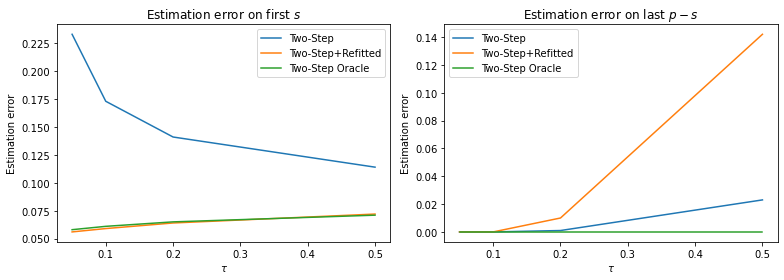

In [93]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(1,2,1)
ax.plot(mean_50.loc["two-step"]["est_error"],label="Two-Step")
#ax.plot(mean_50.loc["two-step"]["est_error"],label=r"Two-Step, $n=\lceil \frac{30 s}{\tau} \rceil$")
ax.plot(mean_50.loc["two-step+refitted"]["est_error"],label="Two-Step+Refitted")
ax.plot(mean_50.loc["two-step oracle"]["est_error"],label="Two-Step Oracle")
# ax.hlines(error_stump, 0, 400, linestyle="-", label="Single stump", color="black")
ax.legend()#loc="upper left"
ax.set_xlabel(r"$\tau$")
ax.set_ylabel("Estimation error")
ax.set_title("Estimation error on first $s$")
#plt.title(r"$\tau$={}".format(alpha))
ax = fig.add_subplot(1,2,2)
ax.plot(mean_50.loc["two-step"]["est_error_FP"],label="Two-Step")
ax.plot(mean_50.loc["two-step+refitted"]["est_error_FP"],label="Two-Step+Refitted")
ax.plot(mean_50.loc["two-step oracle"]["est_error_FP"],label="Two-Step Oracle")
ax.legend()#loc="upper left"
ax.set_xlabel(r"$\tau$")
ax.set_ylabel("Estimation error")
ax.set_title("Estimation error on last $p-s$")
#ax.plot(mean_50.loc["two-step"]["TPR"],label="Two-Step (TPR)")
#ax.plot(mean_50.loc["two-step+refitted"]["TPR"],label="Two-step+refitted (TPR)")
#ax.plot(mean_50.loc["two-step"]["FPR"],label="Two-Step (FPR)")
#ax.plot(mean_50.loc["two-step+refitted"]["FPR"],label="Two-step+refitted (FPR)")
#ax.legend()#loc="middle left"
#ax.set_xlabel(r"$\tau$")
#ax.set_ylabel("TPR or FPR")
#lines, labels = fig.axes[-1].get_legend_handles_labels()
#fig.legend(lines, labels, loc = 'lower right')
fig.tight_layout()
fig.savefig("Estimation_slides.png")

In [180]:
# table_new = table.rename(index={0.1:r'$\tau=0.1,n=3000$',
#                     0.2:r'$\tau=0.2,n=1500$',
#                     0.3:r'$\tau=0.3,n=1000$',
#                     0.4:r'$\tau=0.4,n=750$',
#                     0.5:r'$\tau=0.5,n=600$'})
# table_new

In [252]:
table_new.to_csv("table_1se_refit.csv")

## Sensitivity

In [71]:
data = pd.read_csv("sensitivity_ind.csv")
data

,Method,alpha,n,p,seed,s,mul,est_error,est_error_FP,TPR,FPR
0,two-step,0.2,2500,1000,100,10,0.2,0.857099,0.347339,0.3,0.016162
1,two-step+refitted,0.2,2500,1000,100,10,0.2,0.708683,1.379558,0.3,0.016162
2,two-step oracle,0.2,2500,1000,100,10,0.2,0.623937,0.000000,NaN,NaN
3,two-step,0.2,2500,1000,100,10,0.4,0.362995,0.200534,1.0,0.034343
4,two-step+refitted,0.2,2500,1000,100,10,0.4,0.293895,0.694133,1.0,0.034343
...,...,...,...,...,...,...,...,...,...,...,...
7492,two-step+refitted,0.2,2500,1000,9,10,0.8,0.054327,0.298138,1.0,0.045455
7493,two-step oracle,0.2,2500,1000,9,10,0.8,0.051005,0.000000,NaN,NaN
7494,two-step,0.2,2500,1000,9,10,1.0,0.082714,0.058094,1.0,0.044444
7495,two-step+refitted,0.2,2500,1000,9,10,1.0,0.041305,0.225566,1.0,0.044444


In [78]:
data = pd.read_csv("sensitivity_.8.csv")
data_group = data.drop(columns=["s","seed","p","n","alpha"])\
.groupby(["mul","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_50 = pd.DataFrame()
for name in mean.columns:
    table_50[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_50 = table_50.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
table_50

est_error  est_error_FP           TPR           FPR
mul Method                                                                   
0.2 two-step           0.681(0.004)  0.222(0.008)  0.471(0.005)  0.013(0.001)
    two-step+refitted  0.707(0.008)  1.167(0.027)  0.471(0.005)  0.013(0.001)
    two-step oracle    0.751(0.009)      0.0(0.0)      nan(nan)      nan(nan)
0.4 two-step           0.335(0.003)  0.115(0.003)  0.995(0.001)  0.018(0.001)
    two-step+refitted    0.3(0.004)  0.578(0.009)  0.995(0.001)  0.018(0.001)
    two-step oracle    0.304(0.004)      0.0(0.0)      nan(nan)      nan(nan)
0.6 two-step           0.184(0.002)  0.064(0.002)      1.0(0.0)  0.018(0.001)
    two-step+refitted  0.164(0.002)  0.322(0.005)      1.0(0.0)  0.018(0.001)
    two-step oracle    0.167(0.002)      0.0(0.0)      nan(nan)      nan(nan)
0.8 two-step           0.126(0.001)  0.043(0.001)      1.0(0.0)  0.018(0.001)
    two-step+refitted  0.112(0.001)  0.219(0.003)      1.0(0.0)  0.018(0.001)
    two-step oracle    0.114(0.001)      0.0(0.0)      nan(nan)      nan(nan)
1.0 two-step           0.096(0.001)  0.033(0.001)      1.0(0.0)  0.018(0.001)
    two-step+refitted  0.085(0.001)  0.166(0.002)      1.0(0.0)  0.018(0.001)
    two-step oracle    0.087(0.001)      0.0(0.0)      nan(nan)      nan(nan)

In [79]:
print(table_50.to_latex())

\begin{tabular}{llllll}
\toprule
    &                 &     est\_error &  est\_error\_FP &           TPR &           FPR \\
mul & Method &               &               &               &               \\
\midrule
0.2 & two-step &  0.681(0.004) &  0.222(0.008) &  0.471(0.005) &  0.013(0.001) \\
    & two-step+refitted &  0.707(0.008) &  1.167(0.027) &  0.471(0.005) &  0.013(0.001) \\
    & two-step oracle &  0.751(0.009) &      0.0(0.0) &      nan(nan) &      nan(nan) \\
0.4 & two-step &  0.335(0.003) &  0.115(0.003) &  0.995(0.001) &  0.018(0.001) \\
    & two-step+refitted &    0.3(0.004) &  0.578(0.009) &  0.995(0.001) &  0.018(0.001) \\
    & two-step oracle &  0.304(0.004) &      0.0(0.0) &      nan(nan) &      nan(nan) \\
0.6 & two-step &  0.184(0.002) &  0.064(0.002) &      1.0(0.0) &  0.018(0.001) \\
    & two-step+refitted &  0.164(0.002) &  0.322(0.005) &      1.0(0.0) &  0.018(0.001) \\
    & two-step oracle &  0.167(0.002) &      0.0(0.0) &      nan(nan) &      nan(nan) \\


/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_67419/2592749747.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_50.to_latex())


# iid

In [58]:
data = pd.read_csv("iid_.8.csv")
data

,Method,alpha,n,p,seed,s,est_error,TPR,FPR
0,two-step,0.05,10000,1000,100,10,0.157064,1.0,0.033333
1,two-step+Adaptive Lasso,0.05,10000,1000,100,10,0.431515,1.0,0.031313
2,two-step oracle,0.05,10000,1000,100,10,0.014035,NaN,NaN
3,glmnet,0.05,10000,1000,100,10,0.030951,1.0,0.000000
4,two-step,0.05,10000,1000,101,10,0.109935,1.0,0.007071
...,...,...,...,...,...,...,...,...,...
11643,glmnet,0.50,600,1000,99,10,0.086402,1.0,0.001010
11644,two-step,0.50,600,1000,9,10,0.123054,1.0,0.094949
11645,two-step+Adaptive Lasso,0.50,600,1000,9,10,0.089138,1.0,0.000000
11646,two-step oracle,0.50,600,1000,9,10,0.065090,NaN,NaN


In [59]:
data_30 = data[data["n"]==300/data["alpha"]]
data_50 = data[data["n"]==500/data["alpha"]]

In [60]:
data_group = data_30.drop(columns=["s","seed","p","n","TPR"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
#std = round(data_group.std()/math.sqrt(500),3)
#table_30 = pd.DataFrame()
#for name in mean.columns:
#    table_30[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_30 = mean.reindex(index=['two-step','glmnet','two-step oracle'],level="Method")
#table = round(table,3)
#table[["n","p"]] = table[["n","p"]].astype(int)
data_group = data_50.drop(columns=["s","seed","p","n","TPR"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
#std = round(data_group.std()/math.sqrt(500),3)
#table_50 = pd.DataFrame()
#for name in mean.columns:
#    table_50[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_50 = mean.reindex(index=['two-step','glmnet','two-step oracle'],level="Method")

In [61]:
table=pd.concat([table_30,table_50],axis=1)
table

est_error    FPR  est_error    FPR
alpha Method                                             
0.05  two-step             0.174  0.010      0.143  0.011
      glmnet               0.034  0.000      0.029  0.000
      two-step oracle      0.018    NaN      0.014    NaN
0.10  two-step             0.070  0.008      0.059  0.009
      glmnet               0.045  0.000      0.037  0.000
      two-step oracle      0.026    NaN      0.020    NaN
0.20  two-step             0.071  0.012      0.051  0.010
      glmnet               0.058  0.000      0.047  0.000
      two-step oracle      0.037    NaN      0.028    NaN
0.50  two-step             0.091  0.025      0.067  0.021
      glmnet               0.087  0.001      0.068  0.000
      two-step oracle      0.059    NaN      0.044    NaN

In [62]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
     &                 &  est\_error &    FPR &  est\_error &    FPR \\
alpha & Method &            &        &            &        \\
\midrule
0.05 & two-step &      0.174 &  0.010 &      0.143 &  0.011 \\
     & glmnet &      0.034 &  0.000 &      0.029 &  0.000 \\
     & two-step oracle &      0.018 &    NaN &      0.014 &    NaN \\
0.10 & two-step &      0.070 &  0.008 &      0.059 &  0.009 \\
     & glmnet &      0.045 &  0.000 &      0.037 &  0.000 \\
     & two-step oracle &      0.026 &    NaN &      0.020 &    NaN \\
0.20 & two-step &      0.071 &  0.012 &      0.051 &  0.010 \\
     & glmnet &      0.058 &  0.000 &      0.047 &  0.000 \\
     & two-step oracle &      0.037 &    NaN &      0.028 &    NaN \\
0.50 & two-step &      0.091 &  0.025 &      0.067 &  0.021 \\
     & glmnet &      0.087 &  0.001 &      0.068 &  0.000 \\
     & two-step oracle &      0.059 &    NaN &      0.044 &    NaN \\
\bottomrule
\end{tabular}



/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_67419/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


# X~Uniform

In [52]:
data = pd.read_csv("uniform_results.csv")
data

,Method,alpha,n,p,seed,s,est_error,est_error_FP,TPR,FPR
0,two-step,0.05,10000,1000,100,10,0.120823,0.084811,1.0,0.069697
1,two-step+refitted,0.05,10000,1000,100,10,0.041434,0.332774,1.0,0.069697
2,two-step oracle,0.05,10000,1000,100,10,0.035321,0.000000,NaN,NaN
3,two-step,0.05,10000,1000,101,10,0.148804,0.050167,1.0,0.038384
4,two-step+refitted,0.05,10000,1000,101,10,0.064546,0.270909,1.0,0.038384
...,...,...,...,...,...,...,...,...,...,...
8995,two-step+refitted,0.05,6000,1000,99,10,0.076338,0.433411,1.0,0.071717
8996,two-step oracle,0.05,6000,1000,99,10,0.079230,0.000000,NaN,NaN
8997,two-step,0.05,6000,1000,9,10,0.191710,0.080976,1.0,0.041414
8998,two-step+refitted,0.05,6000,1000,9,10,0.073970,0.359409,1.0,0.041414


In [53]:
data_30 = data[data["n"]==300/data["alpha"]]
data_50 = data[data["n"]==500/data["alpha"]]
data_group = data_30.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_30 = pd.DataFrame()
for name in mean.columns:
    table_30[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_30 = table_30.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
#table = round(table,3)
#table[["n","p"]] = table[["n","p"]].astype(int)
data_group = data_50.drop(columns=["s","seed","p","n"])\
.groupby(["alpha","Method"])
mean = round(data_group.mean(),3)
std = round(data_group.std()/math.sqrt(500),3)
table_50 = pd.DataFrame()
for name in mean.columns:
    table_50[name] = mean[name].map(str) + '(' + std[name].map(str) + ')'
table_50 = table_50.reindex(index=['two-step',
                                   'two-step+refitted',
                                   #'two-step+Adaptive Lasso (same lambda)',
                                   #'two-step+Adaptive Lasso (CV)',#'two-step+IRW(same lambda)',
                                   #'two-step+IRW(CV)',
                                   'two-step oracle'],level="Method")
table=pd.concat([table_30,table_50],axis=1)
table

est_error  est_error_FP       TPR           FPR  \
alpha Method                                                                  
0.05  two-step           0.168(0.001)  0.077(0.001)  1.0(0.0)  0.044(0.001)   
      two-step+refitted  0.076(0.001)  0.354(0.003)  1.0(0.0)  0.044(0.001)   
      two-step oracle    0.075(0.001)      0.0(0.0)  nan(nan)      nan(nan)   
0.10  two-step           0.177(0.001)  0.084(0.001)  1.0(0.0)  0.046(0.001)   
      two-step+refitted  0.082(0.001)   0.37(0.003)  1.0(0.0)  0.046(0.001)   
      two-step oracle    0.077(0.001)      0.0(0.0)  nan(nan)      nan(nan)   
0.20  two-step           0.188(0.001)  0.094(0.001)  1.0(0.0)  0.048(0.001)   
      two-step+refitted  0.093(0.001)  0.385(0.003)  1.0(0.0)  0.048(0.001)   
      two-step oracle    0.085(0.001)      0.0(0.0)  nan(nan)      nan(nan)   

                            est_error  est_error_FP       TPR           FPR  
alpha Method                                                                 
0.05  two-step           0.134(0.001)  0.061(0.001)  1.0(0.0)  0.044(0.001)  
      two-step+refitted  0.061(0.001)  0.281(0.003)  1.0(0.0)  0.044(0.001)  
      two-step oracle    0.059(0.001)      0.0(0.0)  nan(nan)      nan(nan)  
0.10  two-step           0.139(0.001)  0.064(0.001)  1.0(0.0)  0.043(0.001)  
      two-step+refitted  0.063(0.001)  0.292(0.003)  1.0(0.0)  0.043(0.001)  
      two-step oracle    0.061(0.001)      0.0(0.0)  nan(nan)      nan(nan)  
0.20  two-step           0.149(0.001)  0.072(0.001)  1.0(0.0)  0.046(0.001)  
      two-step+refitted  0.069(0.001)   0.31(0.003)  1.0(0.0)  0.046(0.001)  
      two-step oracle    0.065(0.001)      0.0(0.0)  nan(nan)      nan(nan)

In [54]:
print(table.to_latex())

\begin{tabular}{llllllllll}
\toprule
     &                 &     est\_error &  est\_error\_FP &       TPR &           FPR &     est\_error &  est\_error\_FP &       TPR &           FPR \\
alpha & Method &               &               &           &               &               &               &           &               \\
\midrule
0.05 & two-step &  0.168(0.001) &  0.077(0.001) &  1.0(0.0) &  0.044(0.001) &  0.134(0.001) &  0.061(0.001) &  1.0(0.0) &  0.044(0.001) \\
     & two-step+refitted &  0.076(0.001) &  0.354(0.003) &  1.0(0.0) &  0.044(0.001) &  0.061(0.001) &  0.281(0.003) &  1.0(0.0) &  0.044(0.001) \\
     & two-step oracle &  0.075(0.001) &      0.0(0.0) &  nan(nan) &      nan(nan) &  0.059(0.001) &      0.0(0.0) &  nan(nan) &      nan(nan) \\
0.10 & two-step &  0.177(0.001) &  0.084(0.001) &  1.0(0.0) &  0.046(0.001) &  0.139(0.001) &  0.064(0.001) &  1.0(0.0) &  0.043(0.001) \\
     & two-step+refitted &  0.082(0.001) &   0.37(0.003) &  1.0(0.0) &  0.046(0.001) &  0.06

/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_5336/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


In [46]:
data = pd.read_csv("uniform_onepara.csv")
#data = data.dropna()
estimation = data[["alpha","theta0_star","theta0_hat","theta0_debias","theta0_oracle","theta0_boot","results2"]]
                   #,"theta0_hat_boot_adjust"]]
est_group = estimation.groupby(["alpha"])
mean = round(est_group.mean(),3)
std = round(est_group.std()/math.sqrt(500),3)
table = mean[["theta0_star"]]
for name in mean.columns[1:(len(mean.columns)-1)]:
    table[name] = round(mean[name]-mean["theta0_star"],3).map(str) + '(' + std[name].map(str) + ')'
name = "results2"
table["results"] = round(mean[name],3).map(str) + '(' + std[name].map(str) + ')'
table

/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_5336/3547404248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[name] = round(mean[name]-mean["theta0_star"],3).map(str) + '(' + std[name].map(str) + ')'
/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_5336/3547404248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[name] = round(mean[name]-mean["theta0_star"],3).map(str) + '(' + std[name].map(str) + ')'
/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_5336/

,theta0_star,theta0_hat,theta0_debias,theta0_oracle,theta0_boot,results
alpha,,,,,,
0.05,1.312,-0.135(0.003),0.004(0.003),0.0(0.003),-0.057(0.003),0.958(0.009)
0.10,1.415,-0.154(0.004),0.0(0.004),-0.006(0.004),-0.073(0.003),0.94(0.011)
0.20,1.533,-0.166(0.004),0.004(0.004),0.0(0.004),-0.084(0.004),0.956(0.009)


# Inference on one parameter

In [38]:
data = pd.read_csv("onepara_data_.8.csv")
#data = data.dropna()
estimation = data[["alpha","theta0_star","theta0_hat","theta0_debias","theta0_oracle","theta0_boot","results2"]]
                   #,"theta0_hat_boot_adjust"]]
est_group = estimation.groupby(["alpha"])
mean = round(est_group.mean(),3)
mse = mean.copy()
mse["theta0_hat"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_hat'])),3)
mse["theta0_debias"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_debias'])),3)
mse["theta0_oracle"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_oracle'])),3)
mse["theta0_boot"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_boot'])),3)
#std = round(est_group.std()/math.sqrt(500),3)
table = mean[["theta0_star"]]
for name in mean.columns[1:(len(mean.columns)-1)]:
    table[name] = round((mean[name]-mean["theta0_star"])*100,3).map(str) + '/' + round(mse[name]*100,3).map(str)
name = "results2"
table["results"] = round(mean[name],2).map(str)
table

/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_67419/316369562.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[name] = round((mean[name]-mean["theta0_star"])*100,3).map(str) + '/' + round(mse[name]*100,3).map(str)
/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_67419/316369562.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[name] = round((mean[name]-mean["theta0_star"])*100,3).map(str) + '/' + round(mse[name]*100,3).map(str)
/var/folders/44/fh7jk3ps13xgzqc8v05brv

,theta0_star,theta0_hat,theta0_debias,theta0_oracle,theta0_boot,results
alpha,,,,,,
0.05,1.312,-8.1/1.4,1.3/0.7,0.0/0.8,-4.5/0.9,0.94
0.10,1.415,-8.8/1.6,1.8/0.8,0.1/0.9,-5.1/1.1,0.97
0.20,1.533,-9.5/2.0,2.8/1.1,0.8/1.2,-5.6/1.4,0.95


In [39]:
print(table.to_latex())

\begin{tabular}{lrlllll}
\toprule
{} &  theta0\_star & theta0\_hat & theta0\_debias & theta0\_oracle & theta0\_boot & results \\
alpha &              &            &               &               &             &         \\
\midrule
0.05  &        1.312 &   -8.1/1.4 &       1.3/0.7 &       0.0/0.8 &    -4.5/0.9 &    0.94 \\
0.10  &        1.415 &   -8.8/1.6 &       1.8/0.8 &       0.1/0.9 &    -5.1/1.1 &    0.97 \\
0.20  &        1.533 &   -9.5/2.0 &       2.8/1.1 &       0.8/1.2 &    -5.6/1.4 &    0.95 \\
\bottomrule
\end{tabular}



/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_67419/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


In [11]:
data = pd.read_csv("onepara_data_ind.csv")
#data = data.dropna()
estimation = data[["alpha","theta0_star","theta0_hat","theta0_debias","theta0_oracle","theta0_boot","results2"]]
                   #,"theta0_hat_boot_adjust"]]
est_group = estimation.groupby(["alpha"])
mean = round(est_group.mean(),3)
mse = mean.copy()
mse["theta0_hat"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_hat'])),3)
mse["theta0_debias"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_debias'])),3)
mse["theta0_oracle"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_oracle'])),3)
mse["theta0_boot"] = round(est_group.apply(lambda x: mean_squared_error(x['theta0_star'], x['theta0_boot'])),3)
#std = round(est_group.std()/math.sqrt(500),3)
table = mean[["theta0_star"]]
for name in mean.columns[1:(len(mean.columns)-1)]:
    table[name] = round((mean[name]-mean["theta0_star"])*100,3).map(str) + '/' + round(mse[name]*100,3).map(str)
name = "results2"
table["results"] = round(mean[name],2).map(str)
table

/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_29303/3688079700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[name] = round((mean[name]-mean["theta0_star"])*100,3).map(str) + '/' + round(mse[name]*100,3).map(str)
/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_29303/3688079700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[name] = round((mean[name]-mean["theta0_star"])*100,3).map(str) + '/' + round(mse[name]*100,3).map(str)
/var/folders/44/fh7jk3ps13xgzqc8v05b

,theta0_star,theta0_hat,theta0_debias,theta0_oracle,theta0_boot,results
alpha,,,,,,
0.05,1.312,-10.4/1.5,0.3/0.4,-0.1/0.4,-5.8/0.7,0.95
0.10,1.415,-11.4/1.8,0.3/0.5,0.1/0.6,-6.7/1.0,0.94
0.20,1.533,-12.3/2.1,0.9/0.6,0.6/0.6,-7.5/1.1,0.95


In [12]:
print(table.to_latex())

\begin{tabular}{lrlllll}
\toprule
{} &  theta0\_star & theta0\_hat & theta0\_debias & theta0\_oracle & theta0\_boot & results \\
alpha &              &            &               &               &             &         \\
\midrule
0.05  &        1.312 &  -10.4/1.5 &       0.3/0.4 &      -0.1/0.4 &    -5.8/0.7 &    0.95 \\
0.10  &        1.415 &  -11.4/1.8 &       0.3/0.5 &       0.1/0.6 &    -6.7/1.0 &    0.94 \\
0.20  &        1.533 &  -12.3/2.1 &       0.9/0.6 &       0.6/0.6 &    -7.5/1.1 &    0.95 \\
\bottomrule
\end{tabular}



/var/folders/44/fh7jk3ps13xgzqc8v05brvm40000gs/T/ipykernel_29303/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())
